Importo las librerias a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

Cargo el csv y visualizo

In [13]:
df = pd.read_csv("data.csv")
df.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


Aplico los filtros, dropeo las columnas que ya me quedan con valor unico y vuelvo a visualizar

In [14]:
df = df[(df.VarID==2) & (df.Variant=="Medium") & (df.Time <= 2020) ]
df = df.drop(['VarID', 'Variant'],axis=1)
df.head()
#Como las columnas VarID y Variant son lo mismo, podríamos haber hecho el filtro sobre solo una para ahorrar tiempo de computo

,LocID,Location,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,1954,1954.5,4266.484,3884.832,8151.316,12.486


Aplico info y describe para ver que tengo

In [18]:
df.info()
df.describe()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33867 entries, 0 to 280118
Data columns (total 8 columns):
LocID         33867 non-null int64
Location      33867 non-null object
Time          33867 non-null int64
MidPeriod     33867 non-null float64
PopMale       31453 non-null float64
PopFemale     31453 non-null float64
PopTotal      33867 non-null float64
PopDensity    33867 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 2.3+ MB


,LocID,Location,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
count,33867.000000,33867,33867.000000,33867.000000,3.145300e+04,3.145300e+04,3.386700e+04,33867.000000
unique,NaN,474,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Latin America and the Caribbean,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN
mean,1034.761006,NaN,1985.000000,1985.500000,2.224975e+05,2.190330e+05,4.100605e+05,177.607326
std,722.533728,NaN,20.494204,20.494204,4.884886e+05,4.756383e+05,9.359750e+05,1116.694652
min,4.000000,NaN,1950.000000,1950.500000,6.812000e+00,6.889000e+00,6.450000e-01,0.052000
25%,446.000000,NaN,1967.000000,1967.500000,2.276219e+03,2.303914e+03,2.821382e+03,16.077500
50%,903.000000,NaN,1985.000000,1985.500000,2.269989e+04,2.315797e+04,2.984405e+04,35.679000
75%,1586.000000,NaN,2003.000000,2003.500000,1.845308e+05,1.880495e+05,3.318905e+05,101.232000


Calcular la columna de crecimiento anual

In [19]:
df_Arg = df[(df.Location == 'Argentina')] #Creo df de los registros de argentina
df_Arg.head()

,LocID,Location,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
9315,32,Argentina,1950,1950.5,8682.761,8355.149,17037.910,6.226
9316,32,Argentina,1951,1951.5,8852.371,8538.007,17390.378,6.355
9317,32,Argentina,1952,1952.5,9021.292,8721.688,17742.980,6.483
9318,32,Argentina,1953,1953.5,9189.295,8904.995,18094.290,6.612
9319,32,Argentina,1954,1954.5,9356.229,9087.084,18443.313,6.739


Agrego la coluna de Poblacion Total año anterior porque la formula del crecimiento anual seria = PopTotal.diff / PopTotalAnt * 100, siendo Pop.Total.diff = PopTotal menos Pop total año anterior, eso hace la funcion diff

In [25]:
df_Arg["PopTotalAnt"] =  df_Arg.PopTotal.shift(1) #Shift le cambia el indice a los registros de cada fila, el 1 indica que al registro de la fila 1 le va a poner lo del 0, al del 2 la de la 1 y asi
df_Arg.head()


C:\Users\Mateio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,LocID,Location,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,PotTotalAnt,PopTotalAnt
9315,32,Argentina,1950,1950.5,8682.761,8355.149,17037.910,6.226,NaN,NaN
9316,32,Argentina,1951,1951.5,8852.371,8538.007,17390.378,6.355,17037.910,17037.910
9317,32,Argentina,1952,1952.5,9021.292,8721.688,17742.980,6.483,17390.378,17390.378
9318,32,Argentina,1953,1953.5,9189.295,8904.995,18094.290,6.612,17742.980,17742.980
9319,32,Argentina,1954,1954.5,9356.229,9087.084,18443.313,6.739,18094.290,18094.290


Agrego la columna tasa de crecimiento

In [26]:
df_Arg["TasaCrec"] = (df_Arg.PopTotal.diff(1) / df_Arg.PopTotalAnt) * 100
df_Arg.head()

C:\Users\Mateio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,LocID,Location,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,PotTotalAnt,PopTotalAnt,TasaCrec
9315,32,Argentina,1950,1950.5,8682.761,8355.149,17037.910,6.226,NaN,NaN,NaN
9316,32,Argentina,1951,1951.5,8852.371,8538.007,17390.378,6.355,17037.910,17037.910,2.068728
9317,32,Argentina,1952,1952.5,9021.292,8721.688,17742.980,6.483,17390.378,17390.378,2.027569
9318,32,Argentina,1953,1953.5,9189.295,8904.995,18094.290,6.612,17742.980,17742.980,1.979994
9319,32,Argentina,1954,1954.5,9356.229,9087.084,18443.313,6.739,18094.290,18094.290,1.928912


Calculo la velocidad de cambio de la tasa de poblacion, aplicando similar al anterior:

In [28]:
df_Arg["VarCrec"] = (df_Arg.TasaCrec.diff(1) / df_Arg.TasaCrec) * 100
df_Arg.head(50)

C:\Users\Mateio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,LocID,Location,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,PotTotalAnt,PopTotalAnt,TasaCrec,VarCrec
9315,32,Argentina,1950,1950.5,8682.761,8355.149,17037.910,6.226,NaN,NaN,NaN,NaN
9316,32,Argentina,1951,1951.5,8852.371,8538.007,17390.378,6.355,17037.910,17037.910,2.068728,NaN
9317,32,Argentina,1952,1952.5,9021.292,8721.688,17742.980,6.483,17390.378,17390.378,2.027569,-2.029939
9318,32,Argentina,1953,1953.5,9189.295,8904.995,18094.290,6.612,17742.980,17742.980,1.979994,-2.402793
9319,32,Argentina,1954,1954.5,9356.229,9087.084,18443.313,6.739,18094.290,18094.290,1.928912,-2.648226
9320,32,Argentina,1955,1955.5,9521.945,9267.470,18789.415,6.866,18443.313,18443.313,1.876572,-2.789163
9321,32,Argentina,1956,1956.5,9686.375,9446.030,19132.405,6.991,18789.415,18789.415,1.825443,-2.800913
9322,32,Argentina,1957,1957.5,9849.473,9623.000,19472.473,7.115,19132.405,19132.405,1.777445,-2.700368
9323,32,Argentina,1958,1958.5,10011.237,9798.928,19810.165,7.239,19472.473,19472.473,1.734202,-2.493551
9324,32,Argentina,1959,1959.5,10171.716,9974.591,20146.307,7.362,19810.165,19810.165,1.696816,-2.203313


Grafico de Tasa de crecimiento con el correr de los años

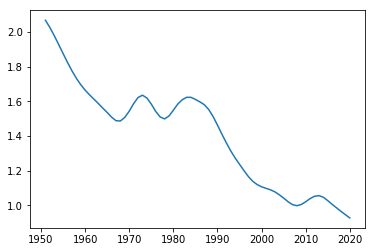

In [31]:
plt.plot(df_Arg.Time,df_Arg.TasaCrec)

Grafico de la variacion de la tasa de crecimiento con el correr de los años

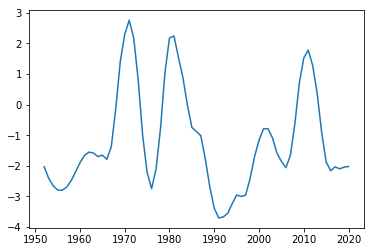

In [32]:
plt.plot(df_Arg.Time,df_Arg.VarCrec)

Para calcular el crecimiento de Argentina segun sexo y cada 5 años, entonces si la division entera da 0, obtenemos los años de quinqueño, ver la columna Time

In [33]:
df_Arg1 = df[(df.Location == 'Argentina') & (df.Time % 5 == 0)]
df_Arg1.head()

,LocID,Location,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
9315,32,Argentina,1950,1950.5,8682.761,8355.149,17037.910,6.226
9320,32,Argentina,1955,1955.5,9521.945,9267.470,18789.415,6.866
9325,32,Argentina,1960,1960.5,10331.018,10150.763,20481.781,7.484
9330,32,Argentina,1965,1965.5,11116.912,11042.732,22159.644,8.097
9335,32,Argentina,1970,1970.5,11917.560,11963.004,23880.564,8.726


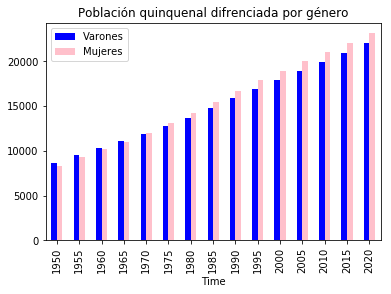

In [59]:
# Observar que conviene poner el año como índice: simplifica la gráfica
df_Grafica_Arg_Quinquenal_Por_Genero = df_Arg1[['Time','PopMale','PopFemale']].set_index('Time')
    
# Crea los objetos Figure y Axes
fig, ax = plt.subplots()
    
# Grafica con barras separadas los datos indicados, en el Axes definido antes
df_Grafica_Arg_Quinquenal_Por_Genero.plot(kind='bar', 
                                              color = ['blue','pink'], 
                                              stacked=False, 
                                              title="Población quinquenal difrenciada por género", 
                                              ax=ax)
    
# Define las leyendas luego de creado el gráfico
ax.legend(["Varones", "Mujeres"])